**Problem 2 QR Factorization**

**2.1** Orthogonality

In [2]:
import numpy as np
from sympy import Matrix
R = np.array([[1., 0., -2.], [0., 1., 2.5], [0., 0., 0.]])
#########################################################
# Write down bases B_1 and B_2 after you've derived them 
#########################Your code starts here#########################
#B_1 = [] # according to row space of R
#B_2 = [] # according to special solution of the nullspace of R
B_1 = R[0][:]-R[1][:]
R[0][:] = B_1[:][:]
B_1 = R

N = Matrix(R)
N = N.nullspace()
B_2 = np.array(N)[0]
#######################################################################
def orth_check(B_1, B_2):
  #### call the function from numpy.linalg.norm
  ###########################Your code starts here########################
  #res =    # numerical check the orthogonality accroding to formula(8)
  ########################################################################
  eps = pow(10,-10)
  B1B2 = np.dot(B_1 , B_2)
  n_B1B2 = np.linalg.norm(B1B2,1)
  n_B1 = np.linalg.norm(B_1)
  n_B2 = np.linalg.norm(B_2,1)
  result = n_B1B2/n_B1*n_B2
  if np.abs(result) <= eps:
    res = True
  else:
    res = False

  return res

print('Numerically check the B_1 is orthogonal to B_2')
print(orth_check(B_1, B_2))

Numerically check the B_1 is orthogonal to B_2
True


**2.2** Projection

Check projection error orthogonal to w 
False


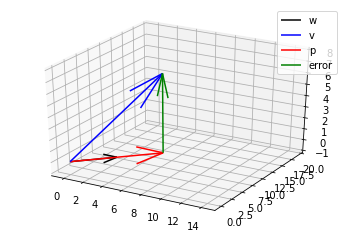

In [4]:
v = np.array([[6], [8], [7]])
w = np.array([[3], [4], [0]])
######################################################################
def proj_vector(w, v):
  # the function is doing the projection of v onto w
  #######################Your code starts here########################
  #p =  # p = P_w @v generate the projection based on formula (9) in pdf file
  ####################################################################
  p = np.dot((np.dot(w,w.T)/(np.linalg.norm(w)*np.linalg.norm(w))),v)
  return p

p_1 = proj_vector(w, v)

import matplotlib.pyplot as plt
def plot_3D_vec(w, v, p):
  fig = plt.figure()
  ax = plt.axes(projection='3d')

  ax.set_xlim(-1, 15)
  ax.set_ylim(-1, 20)
  ax.set_zlim(-1, 8)

  O = [0, 0, 0]
  ax.quiver(O[0], O[1], O[2], w[0], w[1], w[2], label='w', color = 'black')
  ax.quiver(O[0], O[1], O[2], v[0], v[1], v[2], label='v', color = 'blue')
  ax.quiver(O[0], O[1], O[2], p[0], p[1], p[2], label='p', color = 'red')
  ax.quiver(p[0], p[1], p[2], v[0]-p[0], v[1]-p[1], v[2]-p[2], label='error', color= 'green')
  #ax.view_init(0, 0)
  plt.legend()

plot_3D_vec(w, v, p_1)

#### check the crucial property of the projection#####################
def check_proj_vec(w, v, p):
  ########################Your code starts here########################
  #res =  # numerically check <w, v-p> close enough to zero or not according to (13)
  #####################################################################
  eps = pow(10,-10)
  ss = np.abs(w,v-p)
  result = np.sqrt(np.dot(np.transpose(ss),ss))/(np.linalg.norm(w)*np.linalg.norm(v))
  result = result.item()

  if np.abs(result) <= eps:
    res = True
  else:
    res = False
  return res

print("Check projection error orthogonal to w ")
print(check_proj_vec(w, v, p_1))

In [5]:
A = np.array([[1., 0.] ,[2., 1.] ,[0., 1.]])

###################################################################
def proj_matrix(A, v):
  # the function is doing projection of v onto the column space of A
  ##############################Your code starts here################
  #p =   # p = P_A @v generate the projection based on formula (10) in pdf file
  ###################################################################
  s2 = np.dot(np.transpose(A),A)
  s2 = pow(s2,-1)
  s1 = np.dot(A,s2)
  s3 = np.dot(np.transpose(A),v)
  p = np.dot(s1,s3)
  return p

p_2 = proj_matrix(A, v)

#### check the crucial property of the projection#####################
def check_proj_matrix(A, v, p):
  #########################Your code starts here#############################
  #res =  # numerically check A^T(v-p) close enough to zero or not according to (13)
  ###########################################################################
  eps = pow(10,-10)
  AT = np.transpose(A)
  sec01 = np.linalg.norm(np.dot(AT,(v-p)))
  sec02 = np.linalg.norm(A)*np.linalg.norm(v)
  result = sec01/sec02
  if np.abs(result) <= eps:
    res = True
  else:
    res = False
  return res

print("Check projection error orthogonal to w ")
print(check_proj_matrix(A, v, p_2))

Check projection error orthogonal to w 
False


**2.3** QR factorization for matrix with independent columns

In [21]:
A = np.array([[1., 2., 0.], [0., 1., 1.], [1., 0., 1.]])

def QR(A):
  #####################Your code starts here##################################
  (n, m) = np.shape(A)
  Q = np.empty([n, n])
  j = 0

  for a in A.T:
    u = np.copy(a)
    for i in range(0, j):
      proj = np.dot(np.dot(Q[:, i].T, a), Q[:, i])
      u -= proj
      
    e = u / np.linalg.norm(u)
    Q[:, j] = e
    j += 1
  R = np.dot(Q.T, A)

  #############################################################################
  return Q, R

Q, R = QR(A)
print("QR Factorization:")
print(Q)
print(R) # Please check your anwsers with the example of problem 2.3 shown in the pdf file

QR Factorization:
[[ 0.70710678  0.57735027 -0.40824829]
 [ 0.          0.57735027  0.81649658]
 [ 0.70710678 -0.57735027  0.40824829]]
[[ 1.41421356e+00  1.41421356e+00  7.07106781e-01]
 [ 3.33066907e-16  1.73205081e+00  2.22044605e-16]
 [ 1.66533454e-16 -1.11022302e-16  1.22474487e+00]]


In [19]:
B = np.array([[0.488894, 0.888396, 0.325191, 0.319207], 
              [1.03469, -1.14707, -0.754928, 0.312859], 
              [0.726885, -1.06887, 1.3703, -0.86488], 
              [-0.303441, -0.809499, -1.71152, -0.0300513], 
              [0.293871, -2.94428, -0.102242, -0.164879], 
              [-0.787283, 1.43838, -0.241447, 0.627707]])

Q_1, R_1 =QR(B)


print("QR Factorization:")
print(Q_1) # Print out Q_1, R_1 matrix out and you can check Q_1^T@Q_1 = I  
print(R_1) # R_1 should be a up-triangular matrix 
          


QR Factorization:
[[ 0.30110946  0.23218197  0.05732795  0.35021806]
 [ 0.63726483 -0.29978632 -0.51580534  0.67246002]
 [ 0.44768795 -0.27934878  0.47674763 -0.55792492]
 [-0.18688909 -0.21156226 -0.7020853  -0.02967486]
 [ 0.18099494 -0.76948649 -0.09697615  0.18988928]
 [-0.48488703  0.37592008  0.03227855  0.27735552]]
[[ 1.6236421   0.          0.64872948 -0.42029906]
 [ 0.          3.826292    0.          0.36911974]
 [ 0.          0.          2.26508022  0.        ]
 [ 0.          0.          0.          1.02810254]]
